In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [14]:
df1 = pd.read_csv('Outlet-i.csv') # Reading Data
df2 = pd.read_csv('Outlet-j.csv')
df3 = pd.read_csv('Outlet-k.csv')

df1 = df1.head(33735)
df2 = df2.head(39312)
df3 = df3.head(56473)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

In [18]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(10)

TransactionDateTime1          0       1     3       5        6        7   \
OutletNumber PumpNumber1                                                   
Outlet-i     1              0.00    0.00  0.00    5.00   201.93   111.24   
             2              0.00    0.00  0.00    5.00   557.20  1112.64   
             4              0.00    0.00  0.00    0.00   248.62   352.88   
Outlet-j     2            953.39  180.02  0.00  219.73   178.94   178.86   
             5             55.68    0.00  0.00    0.00    57.50   241.34   
             7              0.00    0.00  0.00    0.00   633.41  1191.43   
             8              0.00    0.00  0.00    0.00   543.65   831.25   
Outlet-k     1             16.48    0.00  2.07   64.11   402.80   332.55   
             3             28.12    0.00  0.00   19.62   553.54   839.42   
             4             22.93    2.04  0.00  179.60  1270.20   886.44   

TransactionDateTime1           8        9        10       11  ...       14  \
OutletNumber PumpNumber1                                      ...            
Outlet-i     1             136.73   714.60  1559.76  1500.19  ...  1084.69   
             2            1961.25  3087.90  3216.22  3181.48  ...  3187.81   
             4             414.33   529.01   526.20   446.32  ...   413.17   
Outlet-j     2             251.37   409.78   431.32   496.92  ...   421.56   
             5             503.87   805.22   793.49   798.23  ...  1107.87   
             7            1672.27  2085.57  2446.26  2493.90  ...  1848.16   
             8            1522.60  1964.65  2103.93  2327.88  ...  1820.55   
Outlet-k     1             535.44   669.77   765.74   930.13  ...   293.72   
             3            1018.26  1458.28  1755.08  2089.66  ...  1901.06   
             4            1071.77  1192.21  1250.30  1512.75  ...  2414.63   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-i     1             678.81   792.26   781.91   668.34   706.42   
             2            3554.51  3373.40  3588.07  3873.21  3215.31   
             4             372.50   426.07   494.53   306.95   259.09   
Outlet-j     2             318.50   363.77   417.07   307.41   266.19   
             5             555.13   750.61   821.45   893.32   506.17   
             7            1073.44  1459.15  1527.60  2403.50  2162.18   
             8            2013.16  1981.22  2593.00  2295.51  2209.51   
Outlet-k     1             475.18   588.75   705.34   670.41   474.43   
             3            1993.12  1823.36  1983.24  2300.11  1748.45   
             4            2694.63  2583.58  2619.75  2930.66  2638.11   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                      
Outlet-i     1             774.17   450.17   198.74    18.37  
             2            3144.32  2973.06  1955.93   246.05  
             4             313.55   281.51   336.07    38.73  
Outlet-j     2             371.46   277.50   245.11  1780.90  
             5             439.98   547.79   343.11   148.65  
             7            2688.30  1858.60  1050.82     0.00  
             8            2708.34  2212.68  1130.60     0.00  
Outlet-k     1             704.17   565.94  1371.58  1066.78  
             3            1809.21  1778.73  1480.61  1322.85  
             4            3175.37  2613.89  2231.52  1733.89  

[10 rows x 22 columns]

In [19]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-i,1,1559.76,10
1,Outlet-i,2,3873.21,18
2,Outlet-i,4,529.01,9
3,Outlet-j,2,1780.90,23
4,Outlet-j,5,1264.29,13
5,Outlet-j,7,2688.30,20
6,Outlet-j,8,2708.34,20
7,Outlet-k,1,1371.58,22
8,Outlet-k,3,2300.11,18
9,Outlet-k,4,3175.37,20


In [20]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[0 1 0 0 0 2 2 0 2 1 2]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-i,1,1559.76,10,0
1,Outlet-i,2,3873.21,18,1
2,Outlet-i,4,529.01,9,0
3,Outlet-j,2,1780.90,23,0
4,Outlet-j,5,1264.29,13,0
5,Outlet-j,7,2688.30,20,2
6,Outlet-j,8,2708.34,20,2
7,Outlet-k,1,1371.58,22,0
8,Outlet-k,3,2300.11,18,2
9,Outlet-k,4,3175.37,20,1


Text(0, 0.5, 'Error')

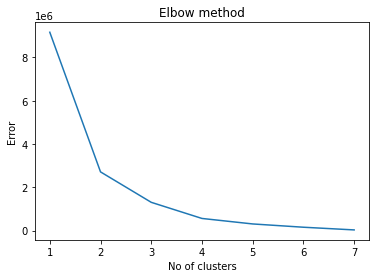

In [21]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

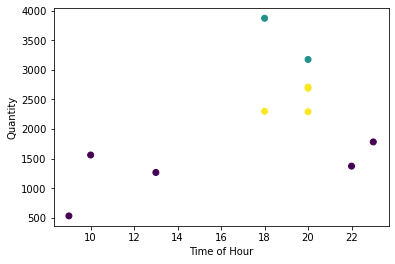

In [22]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [26]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
print('The median is :', med)
c

The median is : 2291.22


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
1,Outlet-i,2,3873.21,18,1
9,Outlet-k,4,3175.37,20,1
6,Outlet-j,8,2708.34,20,2
5,Outlet-j,7,2688.30,20,2
8,Outlet-k,3,2300.11,18,2
10,Outlet-k,6,2291.22,20,2
3,Outlet-j,2,1780.90,23,0
0,Outlet-i,1,1559.76,10,0
7,Outlet-k,1,1371.58,22,0
4,Outlet-j,5,1264.29,13,0


In [24]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-j'

In [25]:
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
1,Outlet-i,2,3873.21,18,1
9,Outlet-k,4,3175.37,20,1
6,Outlet-j,8,2708.34,20,2
5,Outlet-j,7,2688.30,20,2
8,Outlet-k,3,2300.11,18,2
10,Outlet-k,6,2291.22,20,2
3,Outlet-j,2,1780.90,23,0
0,Outlet-i,1,1559.76,10,0
7,Outlet-k,1,1371.58,22,0
4,Outlet-j,5,1264.29,13,0
